# Superposition and Entanglement in Qiskit
This notebook demonstrates:
1. **Superposition** using a single qubit.
2. **Entanglement** using two qubits.
We will use Qiskit to create circuits, visualize the states, and measure outcomes.

In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.3 MB/s eta 0:00:00


In [3]:
!pip install qiskit qiskit-aer matplotlib pylatexenc --quiet

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from IPython.display import display
import matplotlib.pyplot as plt

simulator = AerSimulator(seed_simulator=42)
%matplotlib inline


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## 1. Superposition Example

=== Task 1: Superposition ===

Quantum Circuit:


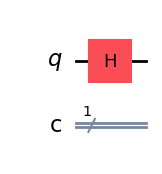


Statevector:
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))

Measurement Counts:
{'0': 526, '1': 498}


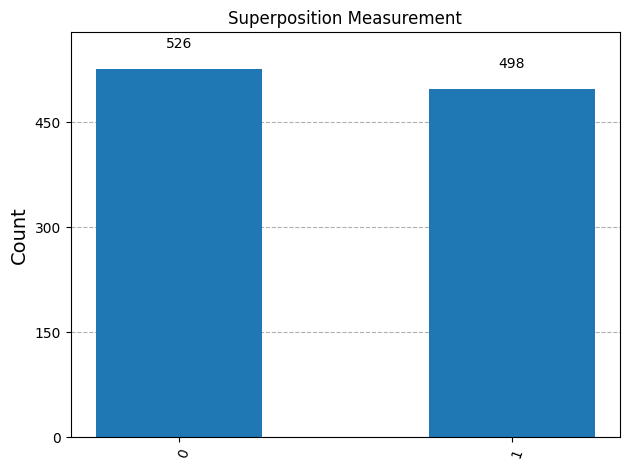

In [4]:
# --- Task 1: Superposition ---
print("=== Task 1: Superposition ===")
qc_super = QuantumCircuit(1, 1)
qc_super.h(0)

# Circuit diagram
print("\nQuantum Circuit:")
display(qc_super.draw('mpl'))

# Bloch sphere
state_super = Statevector.from_instruction(qc_super)
print("\nStatevector:")
print(state_super)
plot_bloch_multivector(state_super) # This is now the last line

# --- Task 1: Measurement ---
qc_super.measure(0, 0)
result_super = simulator.run(qc_super, shots=1024).result()
counts_super = result_super.get_counts()

# Histogram
print("\nMeasurement Counts:")
print(counts_super)
plot_histogram(counts_super, title="Superposition Measurement") # Last line

## 2. Entanglement Example


=== Task 2: Entanglement ===

Quantum Circuit:


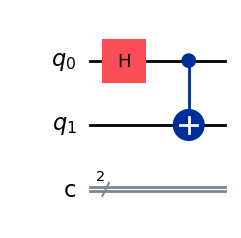


Entangled Statevector:
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))

Measurement Counts:
{'11': 503, '00': 521}


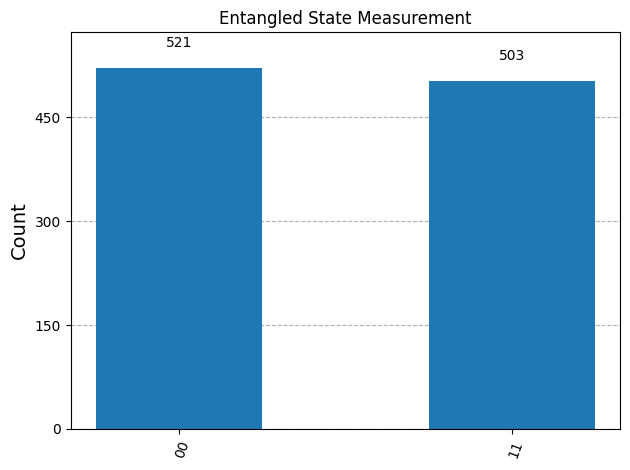

In [5]:
# --- Task 2: Entanglement ---
print("\n=== Task 2: Entanglement ===")

qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)
qc_ent.cx(0, 1)

# Circuit diagram
print("\nQuantum Circuit:")
display(qc_ent.draw('mpl'))

# Entangled statevector
state_ent = Statevector.from_instruction(qc_ent)
print("\nEntangled Statevector:")
print(state_ent)

# --- Task 2: Measurement ---
qc_ent.measure([0, 1], [0, 1])
result_ent = simulator.run(qc_ent, shots=1024).result()
counts_ent = result_ent.get_counts()

# Histogram
print("\nMeasurement Counts:")
print(counts_ent)
plot_histogram(counts_ent, title="Entangled State Measurement") # Last line